In [6]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

In [7]:
X = pd.read_csv("https://raw.githubusercontent.com/kozaka93/2023Z-MachineLearning/main/homeworks/PD1/X.csv", index_col=0)
y = pd.read_csv("https://raw.githubusercontent.com/kozaka93/2023Z-MachineLearning/main/homeworks/PD1/y.csv")
X.info()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=320543)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20000 entries, -3.4409874126905886 to -2.499894177210018
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       20000 non-null  float64
 1   2       20000 non-null  float64
 2   3       20000 non-null  float64
 3   4       20000 non-null  float64
 4   5       20000 non-null  float64
 5   6       20000 non-null  float64
 6   7       20000 non-null  float64
 7   8       20000 non-null  float64
 8   9       20000 non-null  float64
 9   10      20000 non-null  float64
 10  11      20000 non-null  float64
 11  12      20000 non-null  float64
 12  13      20000 non-null  float64
 13  14      20000 non-null  float64
 14  15      20000 non-null  float64
 15  16      20000 non-null  float64
 16  17      20000 non-null  float64
 17  18      20000 non-null  float64
 18  19      20000 non-null  float64
 19  20      20000 non-null  float64
 20  21      20000 non-null  float64
dtypes:

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

max_depth_values = list(range(1, 20))  
min_samples_leaf_values = list(range(1, 11)) 

meansAccEntropy = []
meansAccGini = []
for max_depth in max_depth_values:
        TreeEntropy = DecisionTreeClassifier(random_state=320543, max_depth = max_depth, criterion= 'entropy')
        scores = cross_val_score(TreeEntropy, X_train, y_train, cv = 5)
        meansAccEntropy.append(scores.mean())
        TreeGini = DecisionTreeClassifier(random_state=320543, max_depth = max_depth, criterion= 'gini')
        scores = cross_val_score(TreeGini, X_train, y_train, cv = 5)
        meansAccGini.append(scores.mean())

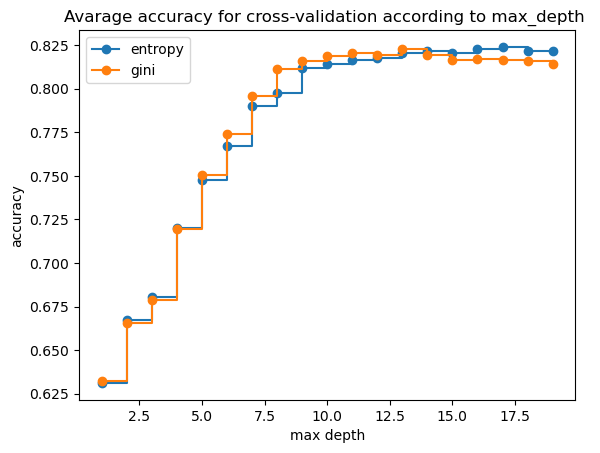

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel("max depth")
ax.set_ylabel("accuracy")
ax.set_title("Avarage accuracy for cross-validation according to max_depth ")
ax.plot(max_depth_values, meansAccEntropy, marker="o", label="entropy", drawstyle="steps-post")
ax.plot(max_depth_values, meansAccGini, marker="o", label="gini", drawstyle="steps-post")
ax.legend()
plt.show()

In [17]:
min_samples_leaf_values = list(range(1, 21)) 

meansAcc = []
for min_sample_leaf in min_samples_leaf_values:
        TreeGini = DecisionTreeClassifier(random_state=320543, max_depth = 8, criterion= 'gini', min_samples_leaf= min_sample_leaf)
        scores = cross_val_score(TreeGini, X_train, y_train, cv = 5)
        meansAcc.append(scores.mean())

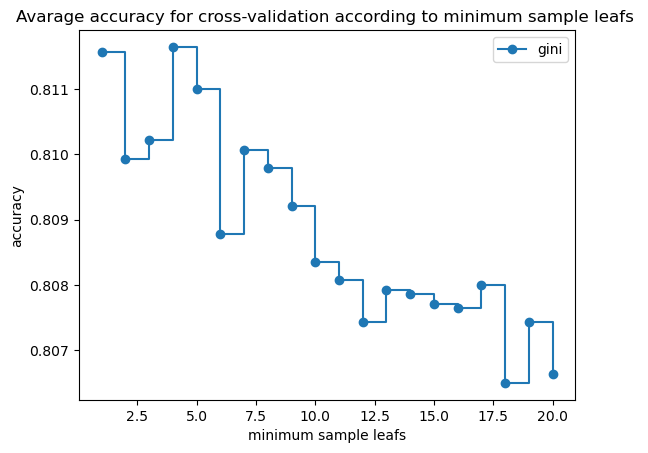

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel("minimum sample leafs")
ax.set_ylabel("accuracy")
ax.set_title("Avarage accuracy for cross-validation according to minimum sample leafs ")
ax.plot(min_samples_leaf_values, meansAcc, marker="o", label="gini", drawstyle="steps-post")
ax.legend()
plt.show()

Wybieramy max_depth = 8, gini

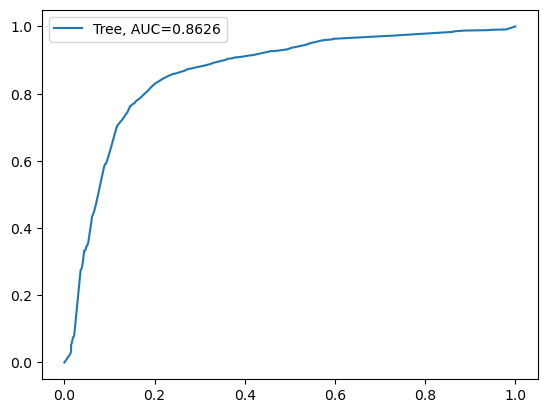

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
Tree = tree.DecisionTreeClassifier(max_depth=8, criterion='gini', random_state= 320543, min_samples_split= 5)
Tree = Tree.fit(X_train, y_train)
pred = Tree.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pred[:,1])
plt.plot(fpr,tpr,label="Tree, AUC="+str(round(roc_auc_score(y_test, pred[:,1]), 4)))
plt.legend()

In [21]:
from sklearn.metrics import confusion_matrix
y_pred_test = Tree.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[2393,  581],
       [ 534, 2492]], dtype=int64)

In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

dokladnosc = (tp + tn)/X_test.shape[0]

czulosc = tp/(tp + fn)

precyzja = tp/(tp + fp)
print(dokladnosc, czulosc, precyzja)

0.8135 0.8218770654329147 0.810890120639061
